# Intro

- Multi-class classification: the target can be only one value. Example: apple, orange, lemon
- Multi-label classification: the target can be multiple differente values at the same time. Example: labels: computer sience, data science, etc...

### Supervised learning models
- KNN makes few assumptions about the structure of the data and it's quite accurate. However, it is also a bit unstable as changes in the data can strongly affect the predictions
- Linear Regression on the other hand makes strong assumptions about the structure of the data and give stable but potentially inaccurate predictions

### Model complexity vs performance

The higher the model complexity the better it will fit the training data. However, at some point more details is just going to overfit the model and this won't generalize as good.

<img src="resources/model_complexity.png" width = "400">

### Overfitting and underfitting
- Overfitting: models that are too complex for the amount of training data available are said to overfit and are not likely to generalize well to new examples.
- Underfitting: models that are too simple, that don't even do well on the training data, are said to underfit and also not likely to generalize well.

For the case of KNN Classifier, as we decrease K, we increase the risk of overfitting -> the predictions are less stable too.



Many real world datasets have a higher dimensional feature space. In other words they have dozens, hundreds, or even thousands, or millions of features. So some of the intuition we gain from looking at low dimensional examples doesn't always translate to high dimensional datasets, and we'll discuss that a bit more later.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

# Preamble and review

In [2]:
# Load data
fruits = pd.read_table('data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# Independent variables
X_fruits = fruits.loc[:, ['height', 'width', 'mass', 'color_score']]

# Dependent variable
y_fruits = fruits.loc[:, "fruit_label"]

# Translator
target_names_fruits = list(fruits.loc[:, "fruit_name"].unique())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state = 0)

# Scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Choosing and training model
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
model.fit(X_train_scaled, y_train)

# Scores
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f'Accuracy of KNN Classifier on training set {train_score:.2f}')
print(f'Accuracy of KNN Classifier on test set {test_score:.2f}')

# Prediction
example_fruit = np.array(X_test.iloc[5, :]).reshape(1, -1)
example_fruit_scaled = scaler.fit_transform(example_fruit)
prediction = model.predict(example_fruit_scaled)

print(f'Predicted fruit type for {example_fruit} is {target_names_fruits[prediction[0]]}')

Accuracy of KNN Classifier on training set 0.95
Accuracy of KNN Classifier on test set 0.80
Predicted fruit type for [[  7.2   7.4 176.    0.6]] is orange


# Datasets

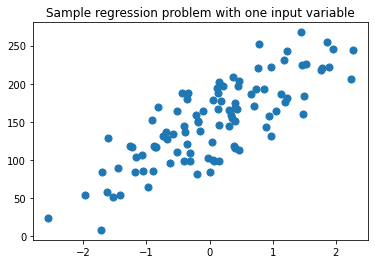

In [4]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

#### Example 1: Synthetic dataset for simple regression
from sklearn.datasets import make_regression

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# Creating data
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)

# Plotting data
plt.figure()
plt.title('Sample regression problem with one input variable')

plt.scatter(X_R1, y_R1, marker = 'o', s = 50)
plt.show()

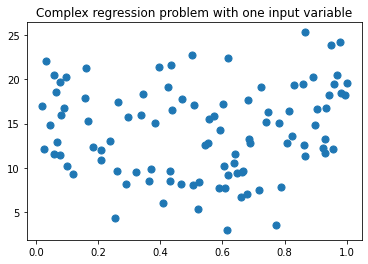

In [5]:
#### Example 2: Synthetic dataset for simple regression
from sklearn.datasets import make_friedman1

# Creating data
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)

# Plotting data
plt.figure()
plt.title('Complex regression problem with one input variable')

plt.scatter(X_F1[:, 2], y_F1, marker = 'o', s = 50)
plt.show()

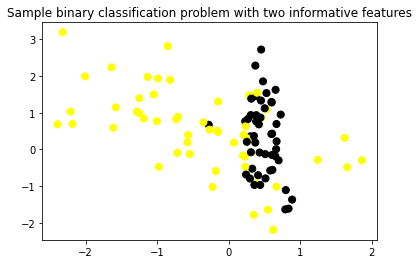

In [6]:
#### Example 3: Synthetic dataset for classification (binary)

# Creating data
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)

# Plotting data
plt.figure()
plt.title('Sample binary classification problem with two informative features')

plt.scatter(X_C2[:, 0], X_C2[:, 1], c = y_C2, marker = 'o', s = 50, cmap = cmap_bold)
plt.show()

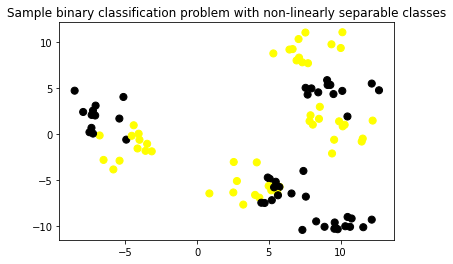

In [7]:
#### Example 4: More difficult synthetic dataset for classification (binary) with classes that are not linearly separable

# Creating data
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

# Plotting data
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')

plt.scatter(X_D2[:, 0], X_D2[:, 1], c = y_D2, marker = 'o', s = 50, cmap = cmap_bold)
plt.show()

# Load data for modelling

In [8]:
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

# K-Nearest Neighbors

- The lower the k, the higher the model complexity because it's fitting every data point
- The higher the k, the lower the model complexity
- If k = number of data points, all predictions would be the most frequent class in the training data.

It can also be used for regression. In this case, the score corresponds to R2.

Pros:
- Simple and easy to understand

Cons:
If the training set has many instances or each instance has many features, this can really slow down the performance of the model. In these cases, we should consider using other models.

### Classification

In [9]:
from utils.adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

# To heavy to execute
#plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
#plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
#plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


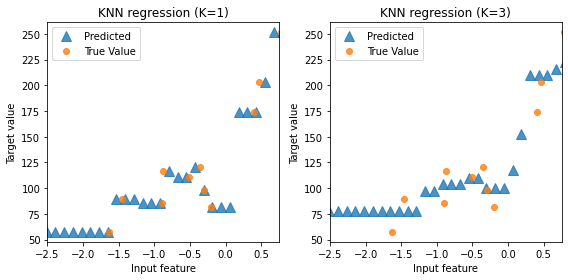

In [11]:
# Matplotlib figure and axes
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
# To predict later on
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

# Iterate over the axes and K
for thisaxis, K in zip(subaxes, [1, 3]):
    # Model selection and training
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    # Prediction
    y_predict_output = knnreg.predict(X_predict_input)

    # X axis limits
    thisaxis.set_xlim([-2.5, 0.75])
    # Prediction plot (per axis)
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    # Training plot (per axis)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)

    # Labels, titles and legend
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
    
plt.tight_layout()

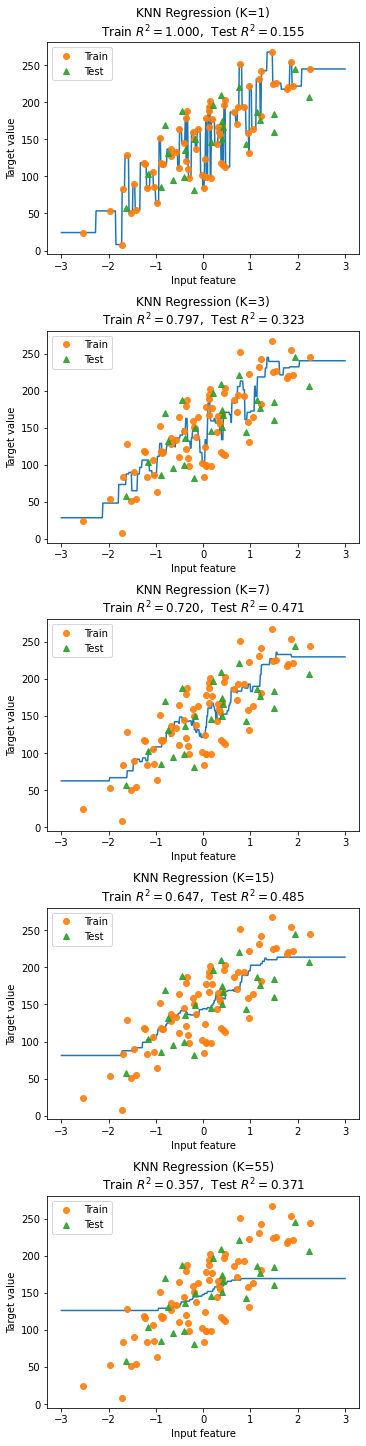

In [12]:
# plot k-NN regression on sample dataset for different values of K
# Matplotlib figure and axes
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
# Values to predict later on
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# Iterate over axes and k
for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    # Model selection and training
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    # Predictions
    y_predict_output = knnreg.predict(X_predict_input)
    # Train and test score
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    # Predictions plot
    thisaxis.plot(X_predict_input, y_predict_output)
    # Training points plot
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    # Test points plot
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    # Labels, title, legend, ...
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
